In [415]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from scipy.stats import mannwhitneyu
import seaborn as sns
import pingouin as pg

from sklearn.metrics import r2_score

start = '\033[1m'
end = '\033[0m'

In [422]:
import os
os.chdir('C:\\Users\\claud\\OneDrive\\Documents')
df = pd.read_csv('Datasets/Juliana/BD_369.csv', encoding = 'latin-1')
df2 = df.drop(columns = ['cargo','edad','estado','genero','num_hijos','estrato','ciudad','ansi_depre_1', 
                          'ansi_depre_2','ansi_depre_3','ansi_depre_4','ansi_depre_5','ansi_depre_6', 'TIME_total',
                         'educacion','uno','dos','cinco','medicamento', 'Date_start', 'Date_end', 'TIME_start', 'TIME_end'])
data = pd.DataFrame()

In [362]:
print(start + 'Estadísticas descriptivas' + end)
display(df2[['despersonalizacion', 'realizacion', 'agotamiento']].describe())

Estadísticas descriptivas


,despersonalizacion,realizacion,agotamiento
count,300.00000,300.000000,300.000000
mean,5.61000,39.996667,12.296667
std,5.58886,8.449931,9.678891
min,0.00000,0.000000,0.000000
25%,0.00000,36.000000,5.000000
50%,5.00000,42.000000,11.000000
75%,9.00000,47.000000,18.000000
max,30.00000,48.000000,51.000000


In [446]:
def compute_r2(bootstrap_sample, original_data):
    return r2_score(original_data, bootstrap_sample)

def bootstrap_approx(col, n):
    '''
    '''
    n_bootstraps = n
    bootstrap_samples = np.random.choice(df2[col], size=(n_bootstraps, 300), replace=True)
    
    original_data = df2[col].to_numpy()
    best_bootstrap_index = np.argmax([compute_r2(sample, original_data) for sample in bootstrap_samples])
    
    random_samples = pd.DataFrame(bootstrap_samples[best_bootstrap_index], columns=[col])
    
    categoria = col + '_cat'
    df2[categoria] = 'original'
    random_samples[categoria]= 'bootstrap'
    
    dataframe = pd.concat([random_samples, df2[[col, categoria]]], ignore_index=True, axis=0)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Kernal density plots
    sns.kdeplot(data= dataframe, x=col, hue= categoria, ax = axs[0])

    # Boxplots
    sns.boxplot(data= dataframe, x = categoria, y = col, ax = axs[1])
    plt.show()

    original = (dataframe[categoria] == 'original')
    bootstrap = (dataframe[categoria] == 'bootstrap')
    ax = sns.jointplot(x=dataframe[original][col].to_numpy(), y=dataframe[bootstrap][col].to_numpy(), kind="reg")
    r, p = stats.pearsonr(dataframe[original][col].to_numpy(), dataframe[bootstrap][col].to_numpy())
    ax.ax_joint.annotate(f'$r = {r:.3f}, p = {p:.3f}$',
                        xy=(0.1,0.9), xycoords = 'axes fraction',
                        ha='left', va='center',
                        bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
    ax.set_axis_labels(xlabel='original', ylabel='bootstrap', size=10)
    plt.show()
    del original, bootstrap, fig, axs, categoria, r, p, n_bootstraps, original_data, bootstrap_samples, best_bootstrap_index, random_samples
    return dataframe

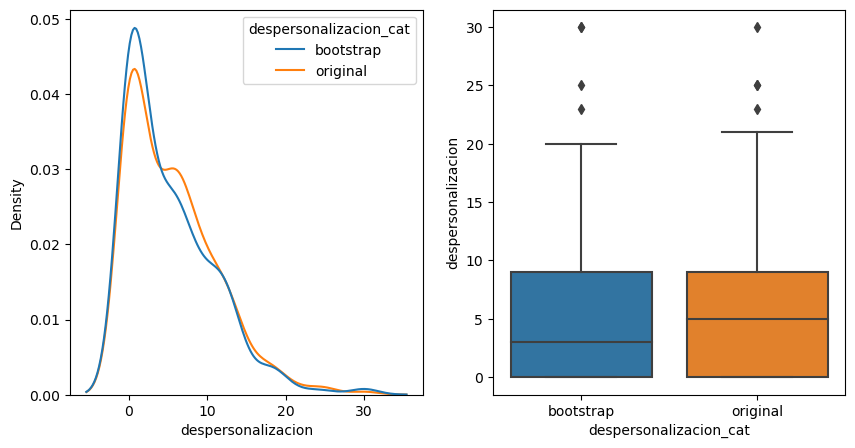

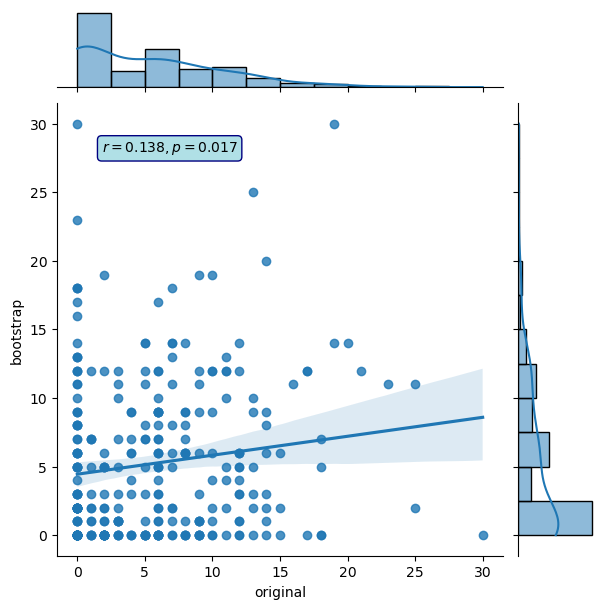

,despersonalizacion,despersonalizacion_cat
0,7,bootstrap
1,2,bootstrap
2,0,bootstrap
3,0,bootstrap
4,16,bootstrap
...,...,...
295,0,bootstrap
296,8,bootstrap
297,5,bootstrap
298,14,bootstrap


In [447]:
data2 = bootstrap_approx('despersonalizacion',5)
data2[(data2['despersonalizacion_cat']=='bootstrap')]

In [448]:
data['catprofesi'] = np.random.binomial(1, 0.76, 300)
data['despersonalizacion'] = data2[(data2['despersonalizacion_cat']=='bootstrap')]['despersonalizacion']

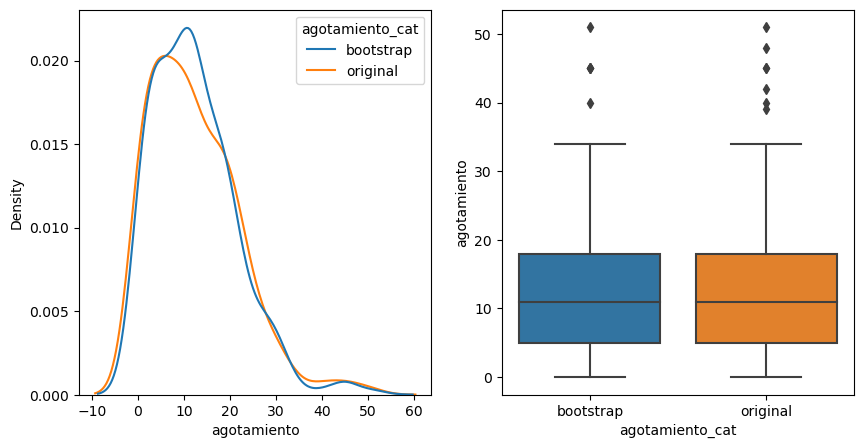

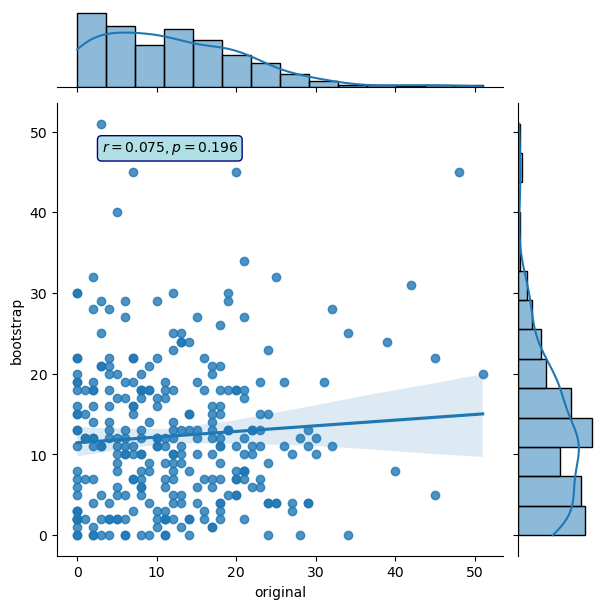

,agotamiento,agotamiento_cat
0,11,bootstrap
1,0,bootstrap
2,18,bootstrap
3,3,bootstrap
4,10,bootstrap
...,...,...
295,32,bootstrap
296,11,bootstrap
297,13,bootstrap
298,23,bootstrap


In [449]:
data2 = bootstrap_approx('agotamiento', 10)
data2[(data2['agotamiento_cat']=='bootstrap')]

In [450]:
data['agotamiento'] = data2[(data2['agotamiento_cat']=='bootstrap')]['agotamiento']

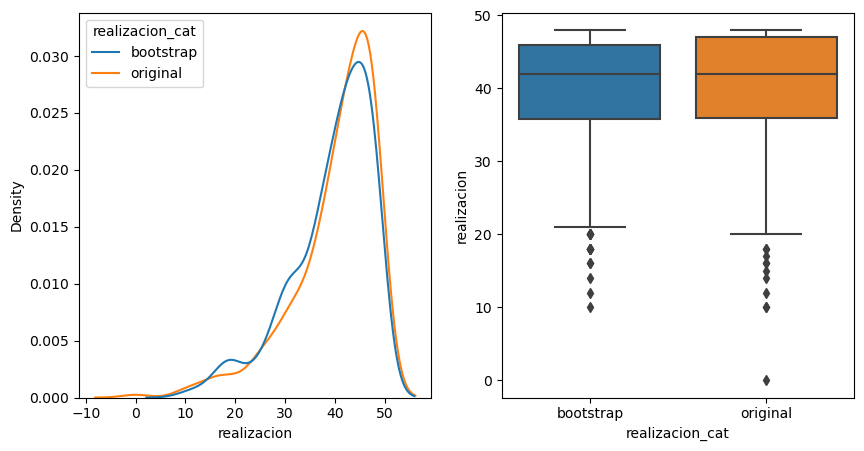

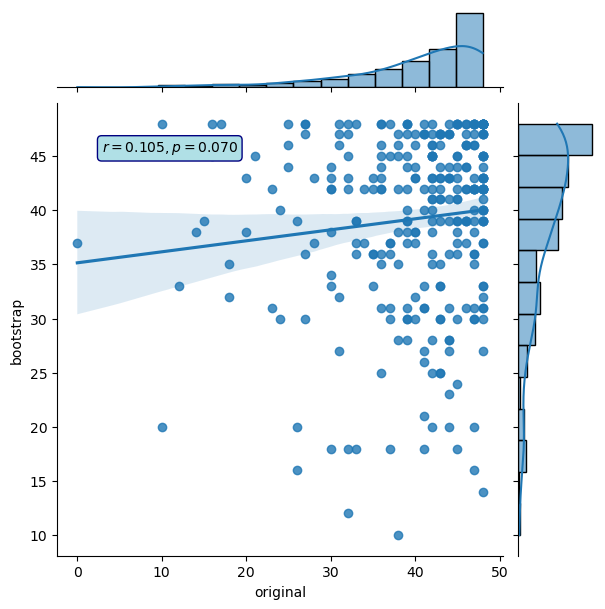

,realizacion,realizacion_cat
0,45,bootstrap
1,30,bootstrap
2,42,bootstrap
3,20,bootstrap
4,48,bootstrap
...,...,...
295,41,bootstrap
296,48,bootstrap
297,36,bootstrap
298,35,bootstrap


In [451]:
data2 = bootstrap_approx('realizacion', 10)
data2[(data2['realizacion_cat']=='bootstrap')]

In [452]:
data['realizacion'] = data2[(data2['realizacion_cat']=='bootstrap')]['realizacion']

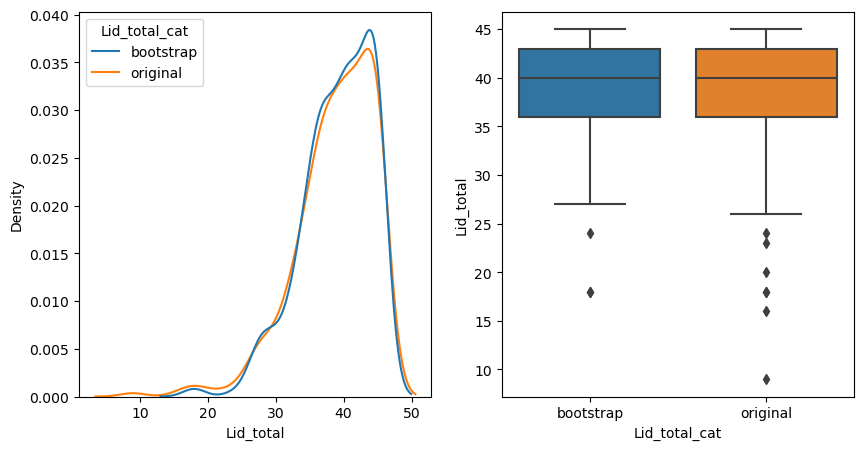

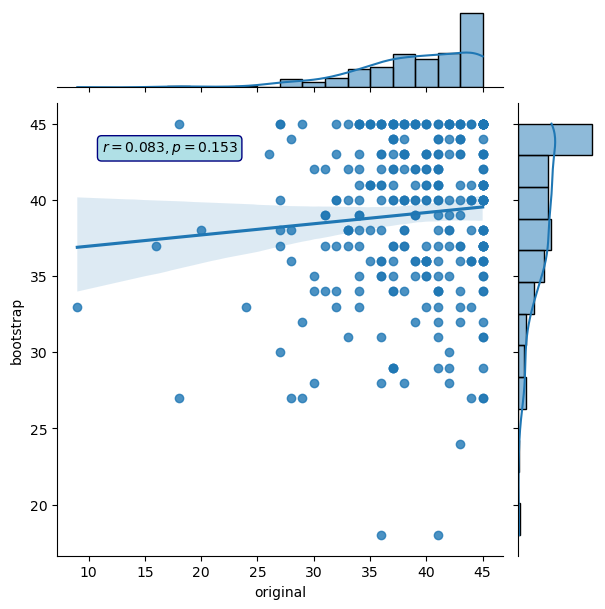

,Lid_total,Lid_total_cat
0,34,bootstrap
1,36,bootstrap
2,45,bootstrap
3,33,bootstrap
4,36,bootstrap
...,...,...
295,42,bootstrap
296,40,bootstrap
297,39,bootstrap
298,42,bootstrap


In [453]:
data2 = bootstrap_approx('Lid_total', 10)
data2[(data2['Lid_total_cat']=='bootstrap')]

In [454]:
data['Lid_total'] = data2[(data2['Lid_total_cat']=='bootstrap')]['Lid_total']

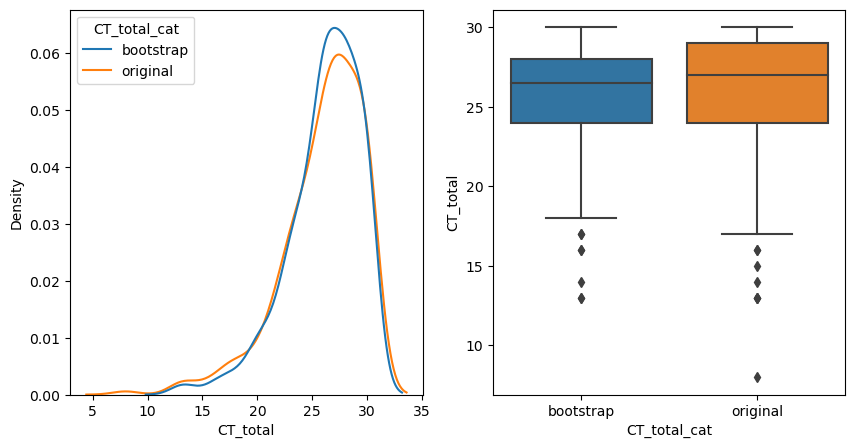

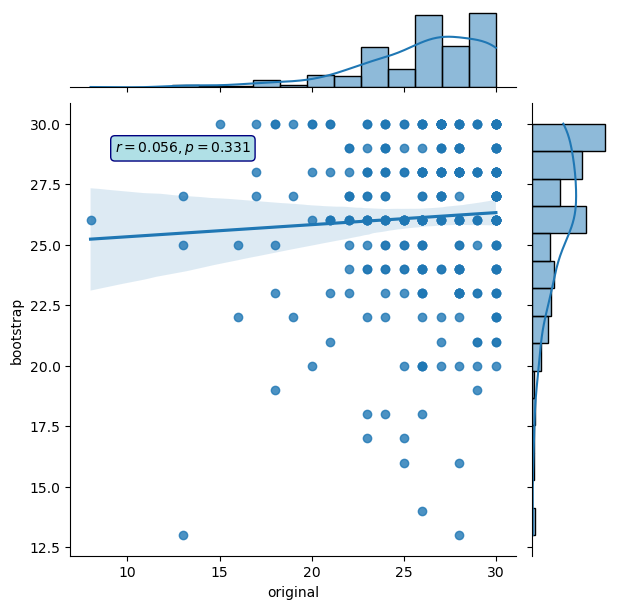

,CT_total,CT_total_cat
0,20,bootstrap
1,29,bootstrap
2,23,bootstrap
3,13,bootstrap
4,27,bootstrap
...,...,...
295,26,bootstrap
296,30,bootstrap
297,27,bootstrap
298,26,bootstrap


In [455]:
data2 = bootstrap_approx('CT_total', 20)
data2[(data2['CT_total_cat']=='bootstrap')]

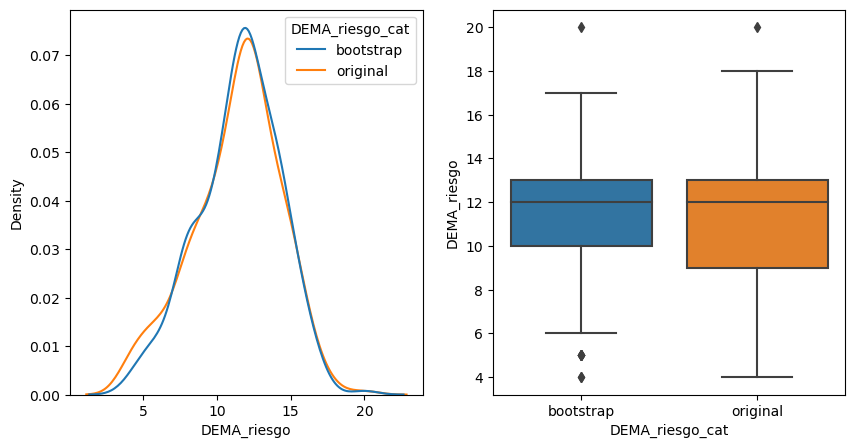

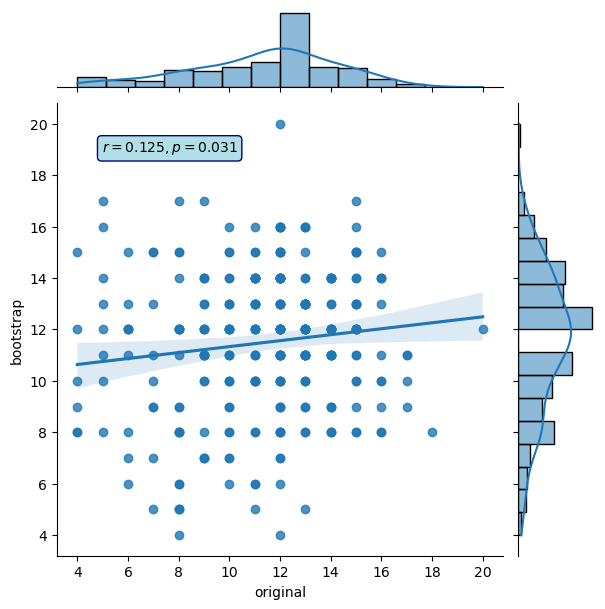

,DEMA_riesgo,DEMA_riesgo_cat
0,11,bootstrap
1,9,bootstrap
2,8,bootstrap
3,12,bootstrap
4,15,bootstrap
...,...,...
295,10,bootstrap
296,13,bootstrap
297,15,bootstrap
298,12,bootstrap


In [458]:
data2 = bootstrap_approx('DEMA_riesgo', 20)
data2[(data2['DEMA_riesgo_cat']=='bootstrap')].sample(7)

In [459]:
data['DEMA_riesgo'] = data2[(data2['DEMA_riesgo_cat']=='bootstrap')]['DEMA_riesgo']

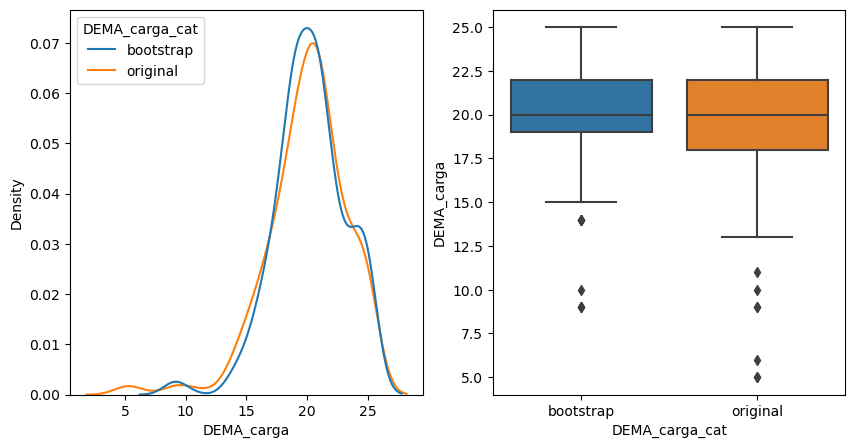

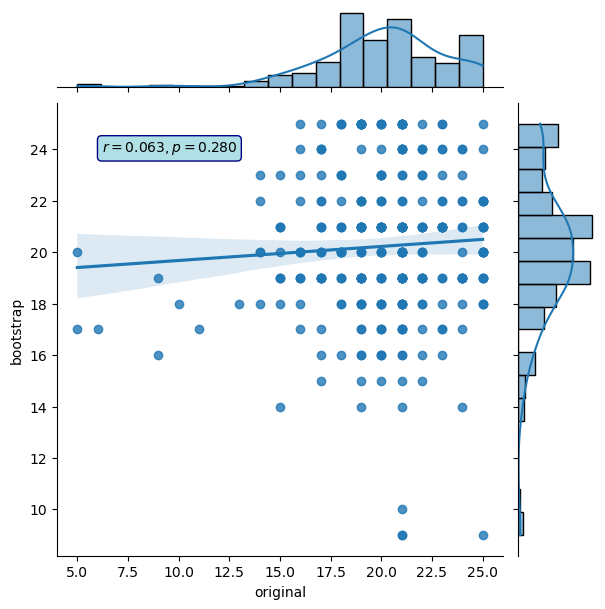

,DEMA_carga,DEMA_carga_cat
66,24,bootstrap
270,20,bootstrap
223,21,bootstrap
120,25,bootstrap
228,19,bootstrap
285,19,bootstrap
92,17,bootstrap


In [466]:
data2 = bootstrap_approx('DEMA_carga', 20)
data2[(data2['DEMA_carga_cat']=='bootstrap')].sample(7)

In [467]:
data['DEMA_carga'] = data2[(data2['DEMA_carga_cat']=='bootstrap')]['DEMA_carga']

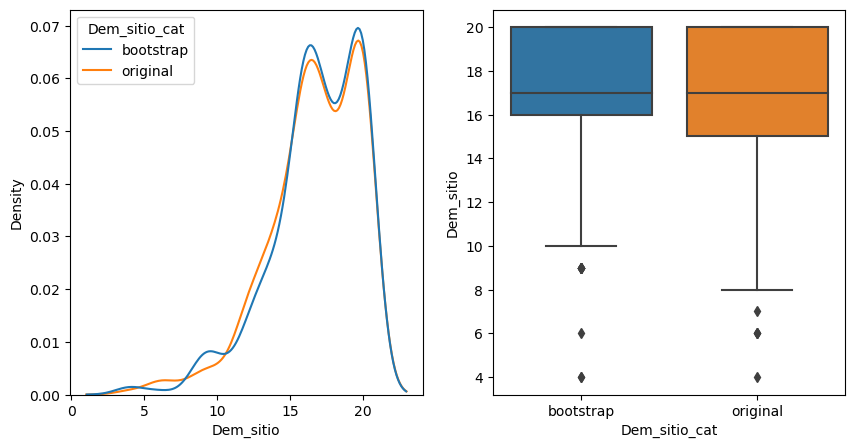

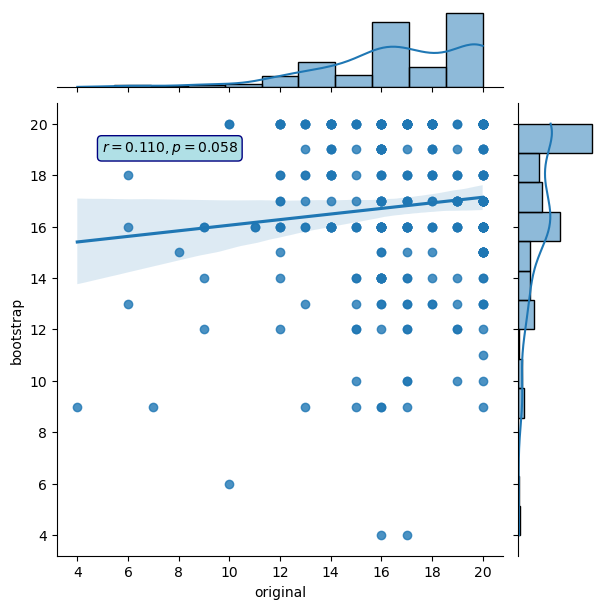

,Dem_sitio,Dem_sitio_cat
297,12,bootstrap
92,20,bootstrap
199,10,bootstrap
70,10,bootstrap
86,20,bootstrap
217,19,bootstrap
80,18,bootstrap


In [468]:
data2 = bootstrap_approx('Dem_sitio', 20)
data2[(data2['Dem_sitio_cat']=='bootstrap')].sample(7)

In [469]:
data['Dem_sitio'] = data2[(data2['Dem_sitio_cat']=='bootstrap')]['Dem_sitio']

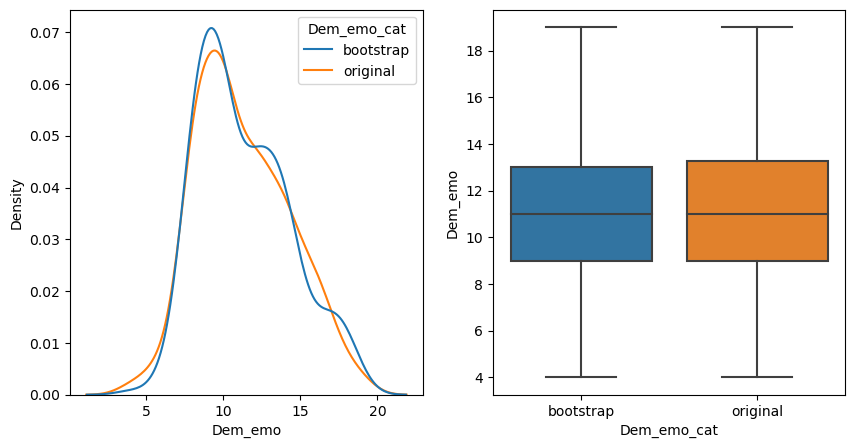

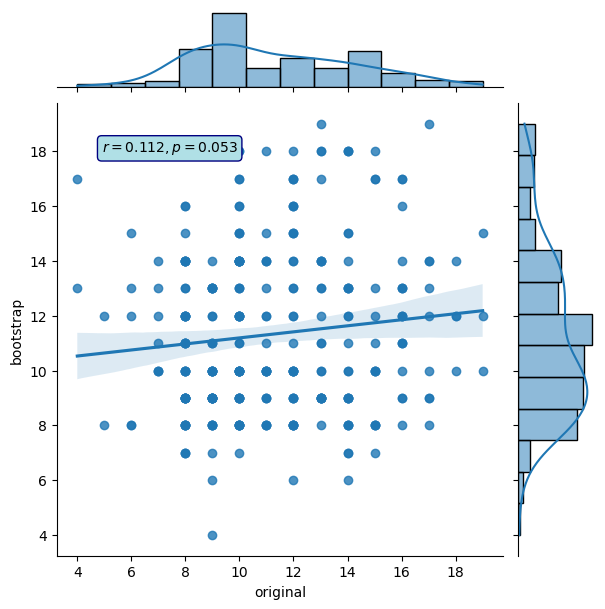

,Dem_emo,Dem_emo_cat
8,11,bootstrap
281,12,bootstrap
47,9,bootstrap
121,11,bootstrap
184,12,bootstrap
19,9,bootstrap
50,10,bootstrap


In [470]:
data2 = bootstrap_approx('Dem_emo', 20)
data2[(data2['Dem_emo_cat']=='bootstrap')].sample(7)

In [471]:
data['Dem_emo'] = data2[(data2['Dem_emo_cat']=='bootstrap')]['Dem_emo']

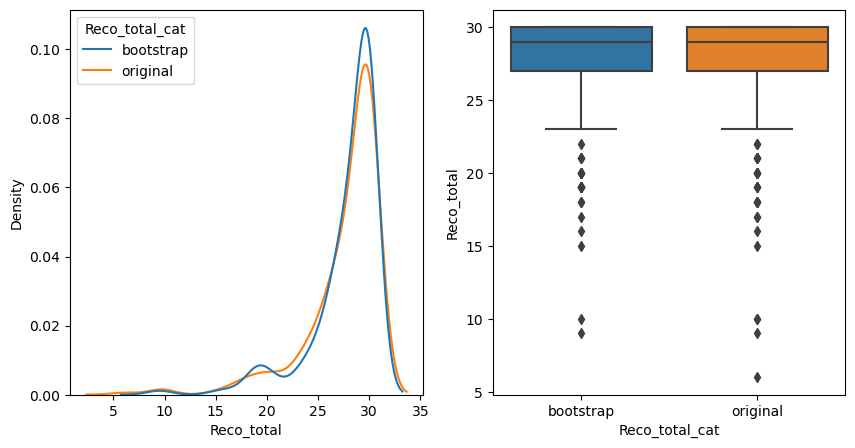

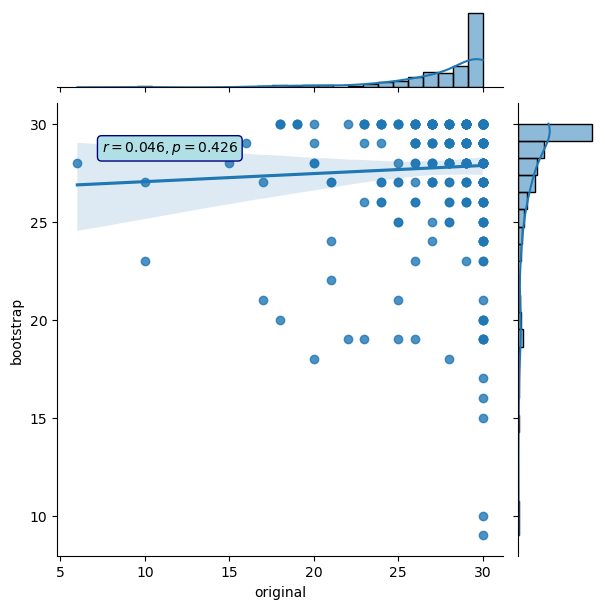

,Reco_total,Reco_total_cat
138,30,bootstrap
259,29,bootstrap
55,30,bootstrap
181,30,bootstrap
219,30,bootstrap
265,17,bootstrap
100,30,bootstrap


In [475]:
data2 = bootstrap_approx('Reco_total', 20)
data2[(data2['Reco_total_cat']=='bootstrap')].sample(7)

In [476]:
data['Reco_total'] = data2[(data2['Reco_total_cat']=='bootstrap')]['Reco_total']

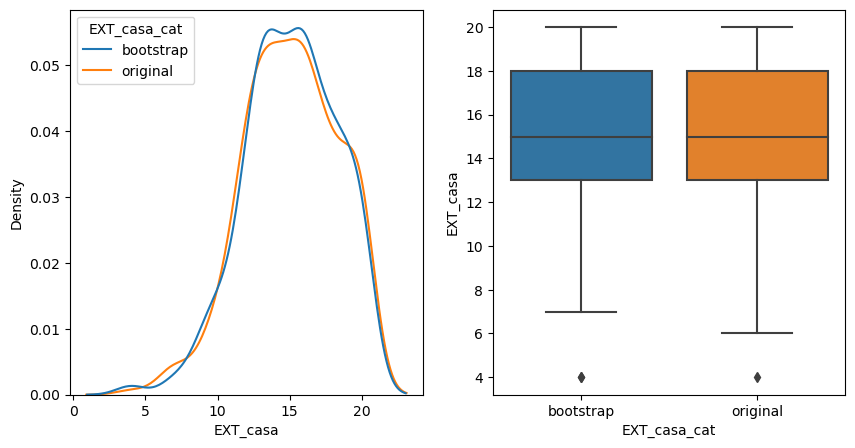

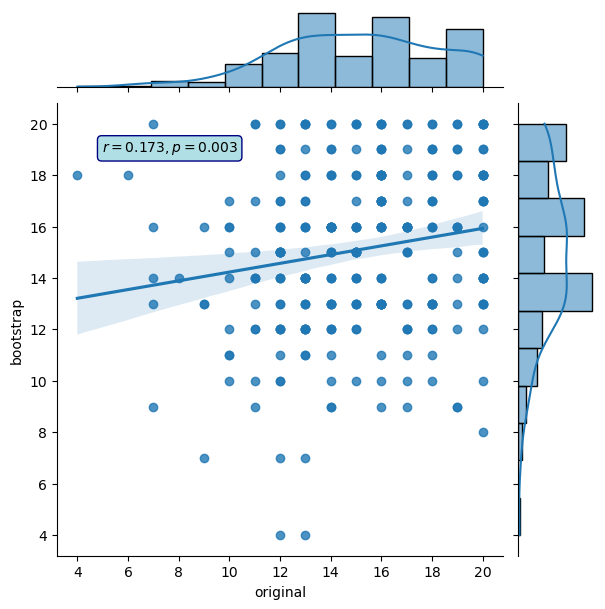

,EXT_casa,EXT_casa_cat
102,11,bootstrap
295,13,bootstrap
88,15,bootstrap
239,13,bootstrap
218,17,bootstrap
246,13,bootstrap
179,17,bootstrap


In [479]:
data2 = bootstrap_approx('EXT_casa', 20)
data2[(data2['EXT_casa_cat']=='bootstrap')].sample(7)

In [480]:
data['EXT_casa'] = data2[(data2['EXT_casa_cat']=='bootstrap')]['EXT_casa']

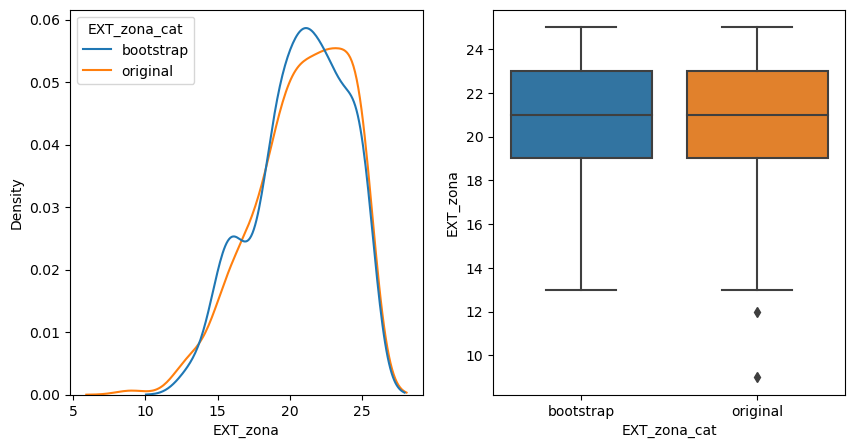

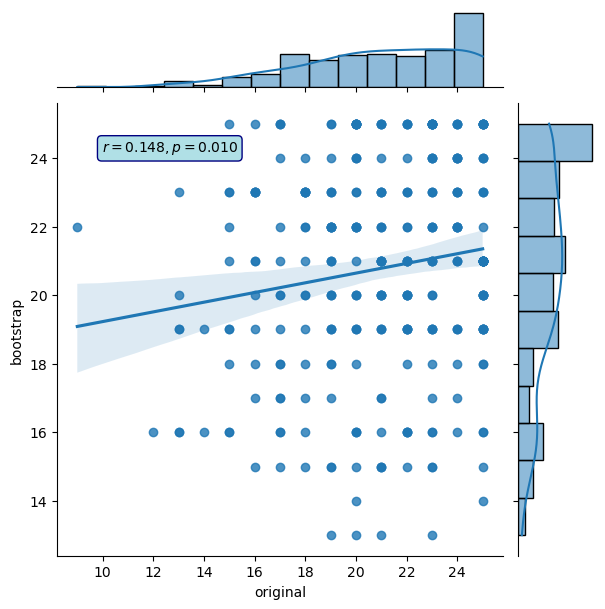

,EXT_zona,EXT_zona_cat
217,20,bootstrap
150,23,bootstrap
187,15,bootstrap
80,16,bootstrap
287,18,bootstrap
94,21,bootstrap
26,20,bootstrap


In [481]:
data2 = bootstrap_approx('EXT_zona', 20)
data2[(data2['EXT_zona_cat']=='bootstrap')].sample(7)

In [482]:
data['EXT_zona'] = data2[(data2['EXT_zona_cat']=='bootstrap')]['EXT_zona']

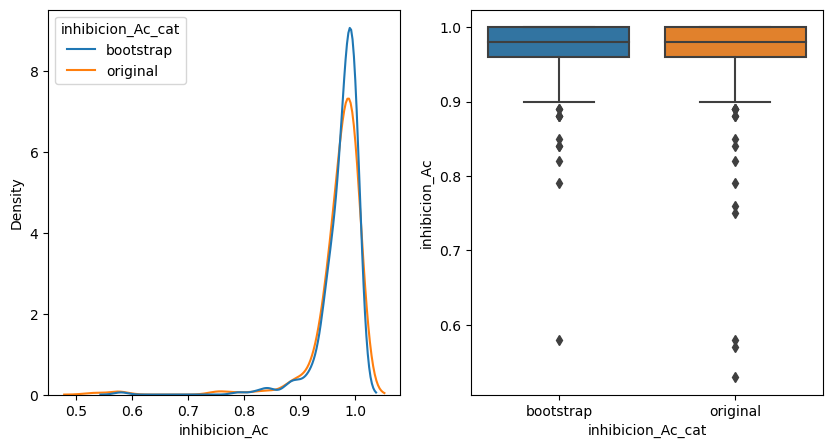

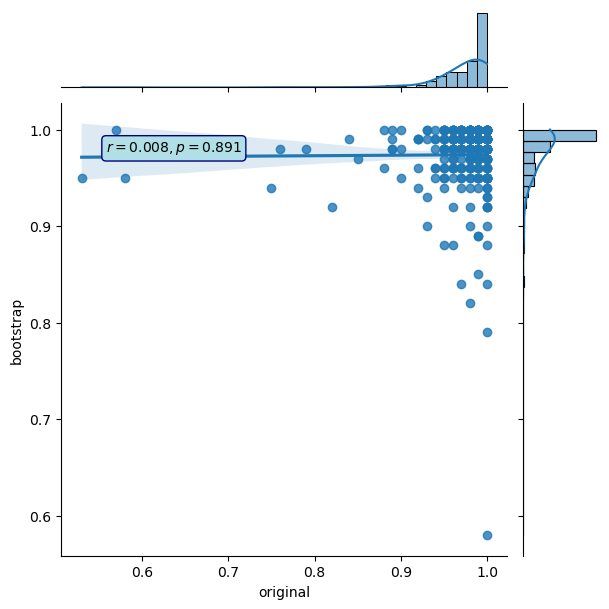

,inhibicion_Ac,inhibicion_Ac_cat
227,0.98,bootstrap
80,1.00,bootstrap
64,1.00,bootstrap
22,0.99,bootstrap
63,0.99,bootstrap
170,1.00,bootstrap
65,0.98,bootstrap


In [483]:
data2 = bootstrap_approx('inhibicion_Ac', 20)
data2[(data2['inhibicion_Ac_cat']=='bootstrap')].sample(7)

In [484]:
data['inhibicion_Ac'] = data2[(data2['inhibicion_Ac_cat']=='bootstrap')]['inhibicion_Ac']

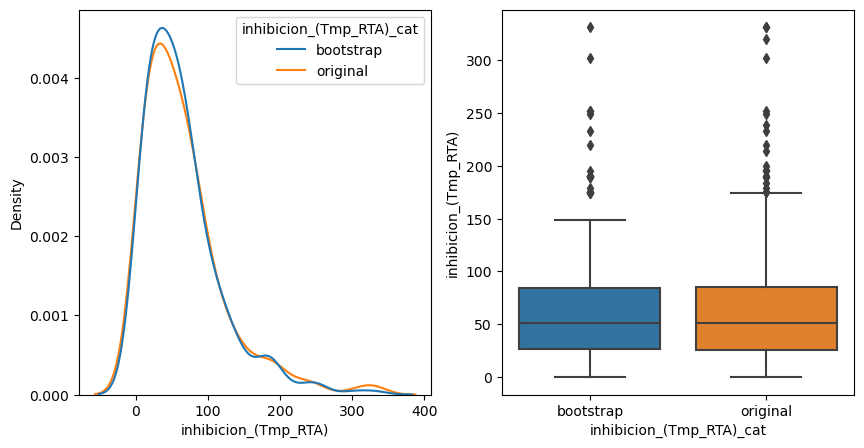

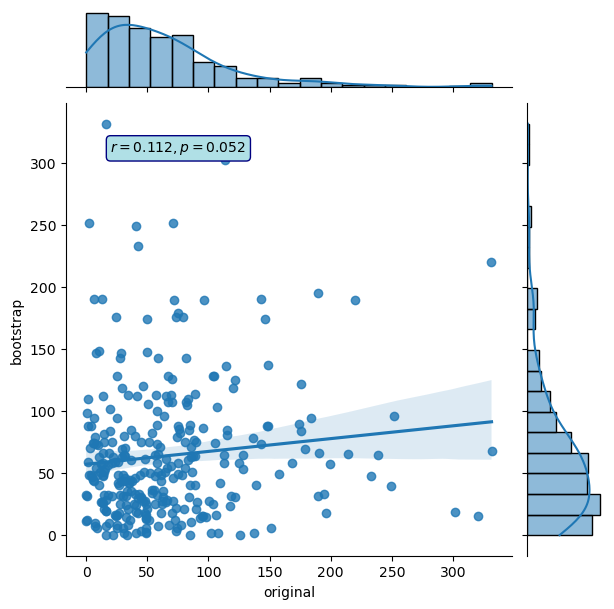

,inhibicion_(Tmp_RTA),inhibicion_(Tmp_RTA)_cat
257,220.07,bootstrap
35,43.68,bootstrap
220,109.55,bootstrap
156,42.39,bootstrap
235,87.68,bootstrap
70,251.75,bootstrap
1,55.97,bootstrap


In [485]:
data2 = bootstrap_approx('inhibicion_(Tmp_RTA)', 20)
data2[(data2['inhibicion_(Tmp_RTA)_cat']=='bootstrap')].sample(7)

In [486]:
data['inhibicion_(Tmp_RTA)'] = data2[(data2['inhibicion_(Tmp_RTA)_cat']=='bootstrap')]['inhibicion_(Tmp_RTA)']

In [488]:
data.describe()

,catprofesi,despersonalizacion,agotamiento,realizacion,Lid_total,DEMA_riesgo,DEMA_carga,Dem_sitio,Dem_emo,Reco_total,EXT_casa,EXT_zona,inhibicion_Ac,inhibicion_(Tmp_RTA)
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.756667,5.22000,12.316667,39.213333,39.076667,11.483333,20.226667,16.776667,11.33000,27.763333,15.093333,20.766667,0.973867,64.133033
std,0.429812,5.61397,9.044468,8.182767,5.166536,2.761971,2.911508,3.072173,2.97612,3.391015,3.170404,3.085009,0.038601,53.928689
min,0.000000,0.00000,0.000000,10.000000,18.000000,4.000000,9.000000,4.000000,4.00000,9.000000,4.000000,13.000000,0.580000,0.230000
25%,1.000000,0.00000,5.000000,35.750000,36.000000,10.000000,19.000000,16.000000,9.00000,27.000000,13.000000,19.000000,0.960000,26.540000
50%,1.000000,3.00000,11.000000,42.000000,40.000000,12.000000,20.000000,17.000000,11.00000,29.000000,15.000000,21.000000,0.980000,51.035000
75%,1.000000,9.00000,18.000000,46.000000,43.000000,13.000000,22.000000,20.000000,13.00000,30.000000,18.000000,23.000000,1.000000,84.182500
max,1.000000,30.00000,51.000000,48.000000,45.000000,20.000000,25.000000,20.000000,19.00000,30.000000,20.000000,25.000000,1.000000,331.390000


In [492]:
df2[['catprofesi', 'despersonalizacion', 'agotamiento', 'realizacion',
       'Lid_total', 'DEMA_riesgo', 'DEMA_carga', 'Dem_sitio', 'Dem_emo',
       'Reco_total', 'EXT_casa', 'EXT_zona', 'inhibicion_Ac',
       'inhibicion_(Tmp_RTA)']].describe()

,catprofesi,despersonalizacion,agotamiento,realizacion,Lid_total,DEMA_riesgo,DEMA_carga,Dem_sitio,Dem_emo,Reco_total,EXT_casa,EXT_zona,inhibicion_Ac,inhibicion_(Tmp_RTA)
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.760000,5.61000,12.296667,39.996667,38.760000,11.32000,19.996667,16.673333,11.263333,27.536667,15.090000,20.883333,0.969000,66.130267
std,0.427797,5.58886,9.678891,8.449931,5.815652,2.97553,3.327697,3.104634,3.017339,3.803975,3.234725,3.225586,0.054192,58.706903
min,0.000000,0.00000,0.000000,0.000000,9.000000,4.00000,5.000000,4.000000,4.000000,6.000000,4.000000,9.000000,0.530000,0.020000
25%,1.000000,0.00000,5.000000,36.000000,36.000000,9.00000,18.000000,15.000000,9.000000,27.000000,13.000000,19.000000,0.960000,25.832500
50%,1.000000,5.00000,11.000000,42.000000,40.000000,12.00000,20.000000,17.000000,11.000000,29.000000,15.000000,21.000000,0.980000,51.035000
75%,1.000000,9.00000,18.000000,47.000000,43.000000,13.00000,22.000000,20.000000,13.250000,30.000000,18.000000,23.000000,1.000000,85.397500
max,1.000000,30.00000,51.000000,48.000000,45.000000,20.00000,25.000000,20.000000,19.000000,30.000000,20.000000,25.000000,1.000000,331.390000


In [493]:
data.to_csv('datos_SB_en_profesionalesColombia.csv')